In [1]:
from seisLM.data_pipeline.foreshock_aftershock_dataset import (
  # create_foreshock_aftershock_dataloaders,
  create_foreshock_aftershock_datasets
)
from seisbench.generate.augmentation import Normalize
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dimension_oder = 'NCW'

datasets = create_foreshock_aftershock_datasets(
  num_classes=9,
  event_split_method='random',
  component_order='ENZ',
  dimension_order=dimension_oder,
)

Seed set to 42
Seed set to 42


In [3]:
import torch
type(torch.from_numpy(datasets['train']['X']))

# type(torch.from_numpy(datasets['train']['X']).float())

torch.Tensor

In [14]:
from seisLM.data_pipeline.foreshock_aftershock_dataloaders import (
  prepare_foreshock_aftershock_dataloaders)

Seed set to 42
Seed set to 42


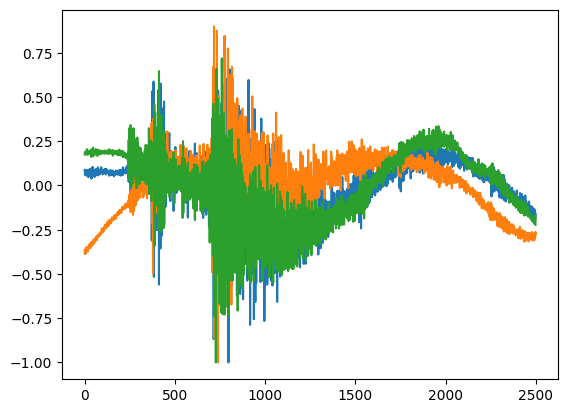

In [22]:
loaders = prepare_foreshock_aftershock_dataloaders(
  num_classes=9,
  batch_size=32,
  event_split_method='random',
  component_order='ENZ',
)

batch = next(iter(loaders['train']))
plt.plot(batch[0][0].T)

Seed set to 42
Seed set to 42


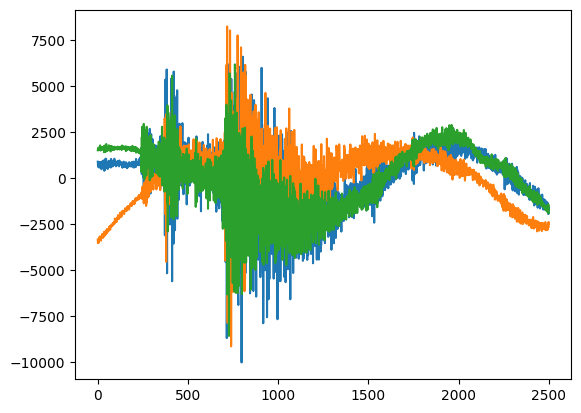

In [23]:
loaders = prepare_foreshock_aftershock_dataloaders(
  num_classes=9,
  batch_size=32,
  event_split_method='random',
  component_order='ENZ',
  standardize=False,
)

batch = next(iter(loaders['train']))
plt.plot(batch[0][0].T)

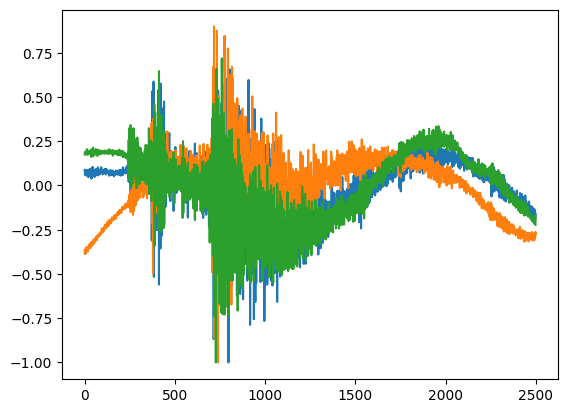

In [21]:
plt.plot(batch[0][0].T)

In [20]:
batch

[tensor([[[ 8.7742e-02,  7.4785e-02,  5.9735e-02,  ..., -1.9620e-01,
           -1.7914e-01, -1.6087e-01],
          [-3.6571e-01, -3.8686e-01, -3.8692e-01,  ..., -2.9642e-01,
           -2.6228e-01, -2.7599e-01],
          [ 1.7447e-01,  1.8443e-01,  1.8973e-01,  ..., -1.6756e-01,
           -2.0349e-01, -2.2276e-01]],
 
         [[-7.8578e-04,  1.0130e-02,  1.4328e-02,  ..., -1.0946e-03,
            3.4765e-03, -2.1222e-03],
          [-2.6572e-03,  3.9399e-03,  7.9112e-03,  ..., -3.8465e-03,
           -3.8138e-03, -2.8652e-03],
          [ 2.0262e-02,  1.3337e-02,  1.0341e-02,  ..., -5.2111e-03,
           -4.9157e-03, -5.4316e-04]],
 
         [[ 4.6501e-03,  2.6103e-03, -1.2698e-03,  ..., -5.9692e-04,
           -1.2320e-03, -1.4744e-03],
          [-4.2143e-03, -4.4225e-04,  3.5401e-03,  ...,  1.1874e-03,
            1.2690e-03,  1.6443e-03],
          [-8.7395e-03, -5.3781e-03,  8.2699e-04,  ..., -1.3522e-03,
            6.5513e-04,  1.3482e-03]],
 
         ...,
 
         [[ 

In [5]:
  X_train, y_train = datasets['train']['X'], datasets['train']['y']
  # X_val, y_val = datasets['val']['X'], datasets['val']['y']
  # X_test, y_test = datasets['test']['X'], datasets['test']['y']

  mean, std = X_train.mean(), X_train.std()
  X_train_processed = (X_train - mean) / std
  # X_val = (X_val - mean) / std
  # X_test = (X_test - mean) / std

  mean0, std0 = X_train.mean(axis=0, keepdims=True), X_train.std(axis=0, keepdims=True)
  X_train_processed0 = (X_train - mean0) / std0

In [6]:
normalizer = Normalize(
  demean_axis=dimension_oder.index('W'),
  amp_norm_axis=dimension_oder.index('W'),
  amp_norm_type='peak'
  )

# normalizer(datasets['train'])

state_dict = datasets['train']
x = state_dict['X']
x = normalizer._demean(x)
x = normalizer._detrend(x)
x = normalizer._amp_norm(x)
X_train_processed1 = x

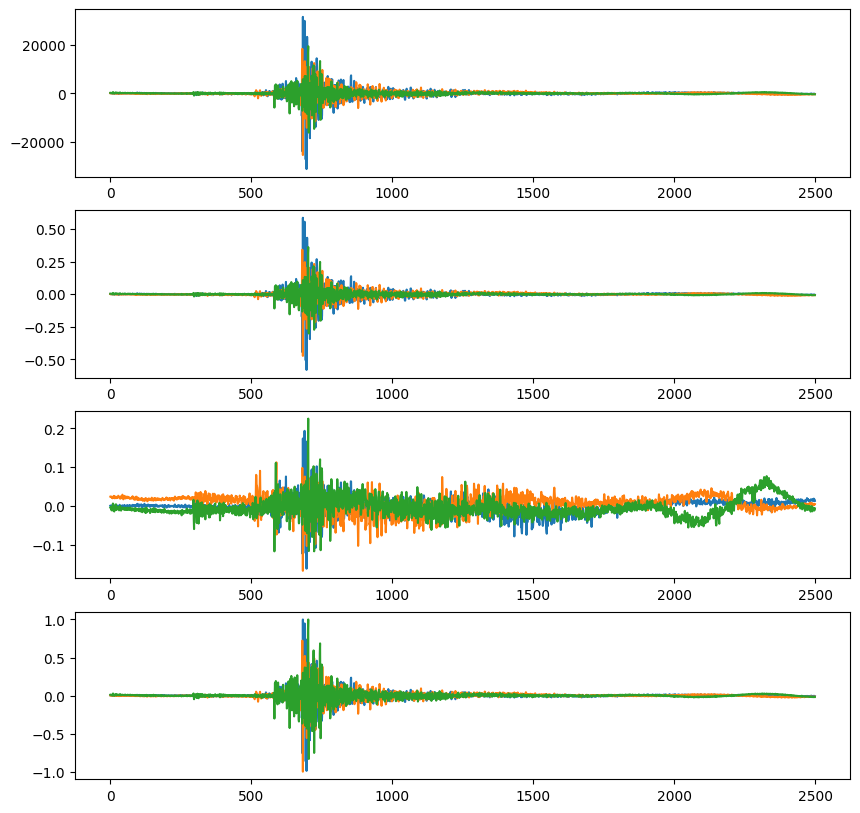

In [7]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].plot(X_train[0].T)
axes[1].plot(X_train_processed[0].T)
axes[2].plot(X_train_processed0[0].T)
axes[3].plot(X_train_processed1[0].T)


In [8]:
x = state_dict['X'][:1]
# x, metadata = state_dict[normalizer.key[0]]
x = normalizer._demean(x)
x = normalizer._detrend(x)
x = normalizer._amp_norm(x)
X_train_processed1_single = x


In [9]:
sum( (X_train_processed1_single[0] - X_train_processed1[0]) ** 2 )

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

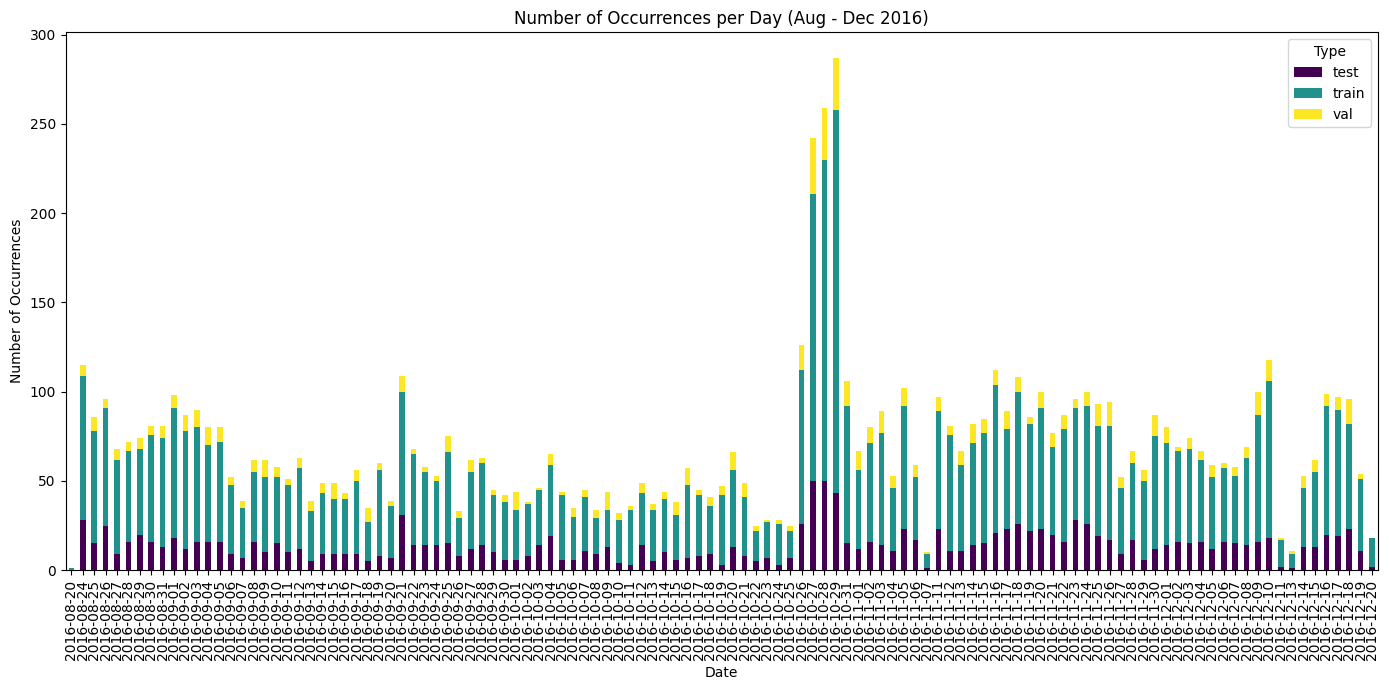

In [10]:
# datasets['train']['occurence_time']
train_occurence_time = datasets['train']['occurence_time']
val_occurence_time = datasets['val']['occurence_time']
test_occurence_time = datasets['test']['occurence_time']



# Combine all timestamps into a DataFrame
train_df = pd.DataFrame(train_occurence_time, columns=['timestamp'])
train_df['type'] = 'train'
val_df = pd.DataFrame(val_occurence_time, columns=['timestamp'])
val_df['type'] = 'val'
test_df = pd.DataFrame(test_occurence_time, columns=['timestamp'])
test_df['type'] = 'test'

# Concatenate all data
df = pd.concat([train_df, val_df, test_df])

# Extract the date part and count occurrences
df['date'] = df['timestamp'].dt.date
occurrences = df.groupby(['date', 'type']).size().unstack(fill_value=0)

# Plotting
occurrences.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences per Day (Aug - Dec 2016)')
plt.legend(title='Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [11]:
from seisLM.data_pipeline.foreshock_aftershock_dataloaders import (
  # create_foreshock_aftershock_dataloaders,
  prepare_foreshock_aftershock_dataloaders
)


In [12]:
loaders = prepare_foreshock_aftershock_dataloaders(
  num_classes=2,
  batch_size=32,
  event_split_method='temporal'
)


TypeError: prepare_foreshock_aftershock_dataloaders() missing 1 required positional argument: 'component_order'

In [ ]:
batch = next(iter(loaders['train']))

In [ ]:
X, y = batch


In [ ]:
plt.plot(X[0].T)
